In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('gist_rainbow')
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

In [6]:
# Load sample data
data = pd.read_csv('RATIO.csv')

In [8]:
data.head()

,product_name,Rate,Review,Summary,Sentiment
0,SAMSUNG 198 L Direct Cool Single Door 5 Star R...,1,Very poor,problems 1 it gets auto defrost randomly anyti...,positive
1,SAMSUNG 236 L Frost Free Double Door 2 Star Re...,2,Moderate,freeze segment is tooo large so cooling segmen...,positive
2,SAMSUNG 189 L Direct Cool Single Door 5 Star R...,3,Nice,warranty sticker is not present when its run d...,positive
3,SAMSUNG 253 L Frost Free Double Door 3 Star Co...,3,Just okay,everything is goodworking fine but it is silly...,positive
4,Godrej 180 L Direct Cool Single Door 2 Star Re...,3,Decent product,refrigerator working fine but top and side vie...,positive


In [28]:
# Tokenize the text corpus
tokens = word_tokenize(text)

In [29]:
# Stem the tokens using the Porter stemming algorithm
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]

In [30]:
# Compute the frequency distribution of the stemmed tokens
fdist = FreqDist(stemmed_tokens)

In [31]:
# Print the most common tokens and their frequencies
print(fdist.most_common(10))

[('good', 22446), ('is', 18607), ('product', 17548), ('it', 16247), ('the', 12052), ('veri', 11978), ('not', 11068), ('and', 11065), ('for', 9661), ('nice', 8722)]


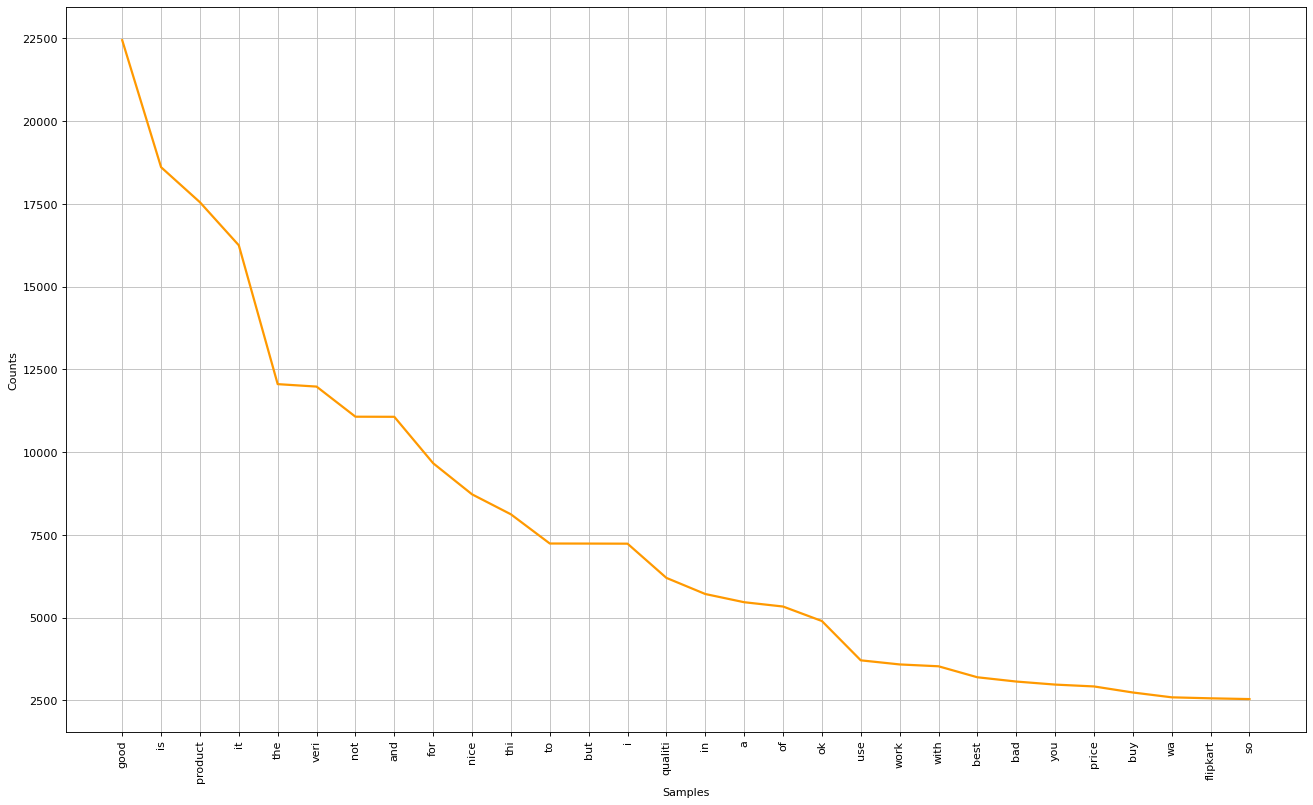

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
# Plot the frequency distribution of the stemmed tokens
plt.figure(figsize=(20, 12), dpi=80)
fdist.plot(30, cumulative=False)

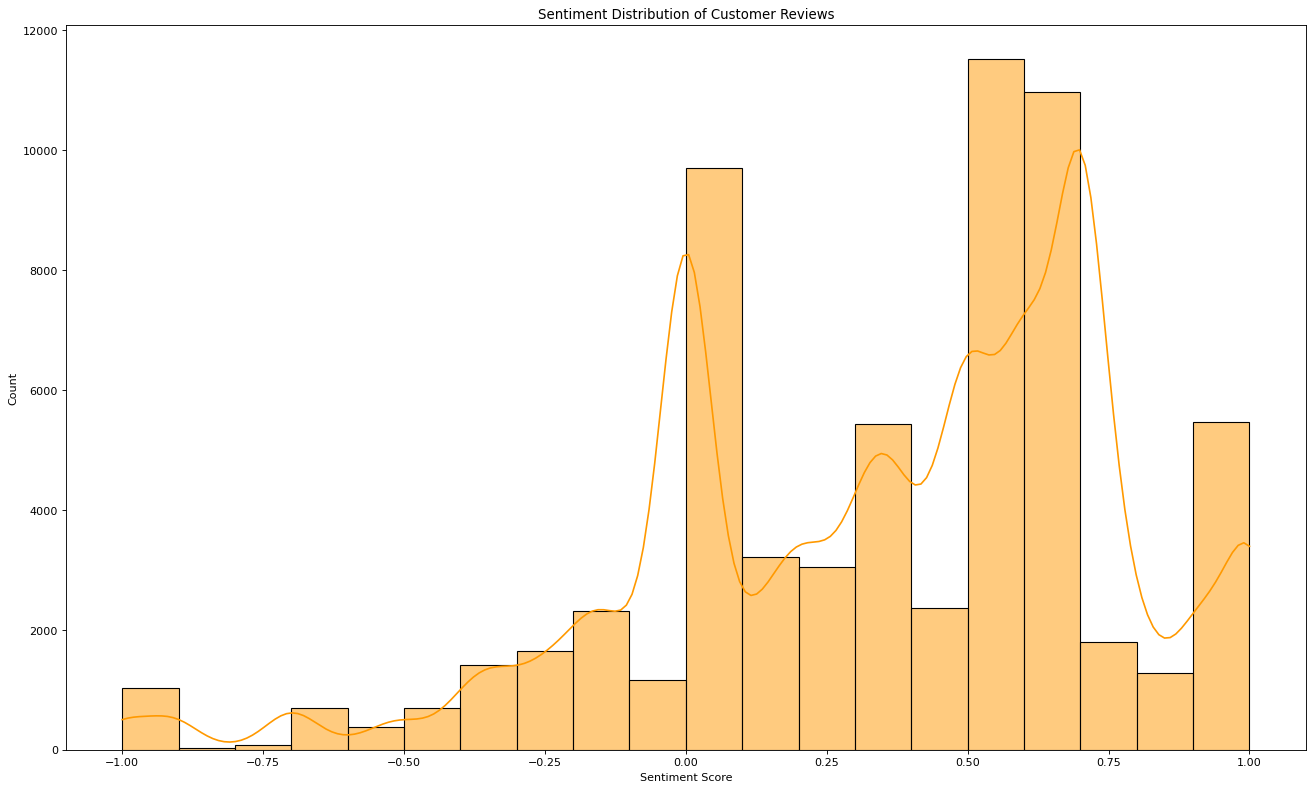

In [18]:
# Perform sentiment analysis using TextBlob
sentiments = []
for review in data['Summary']:
    blob = TextBlob(review)
    sentiments.append(blob.sentiment.polarity)

# Add sentiment scores to the data frame
data['sentiment'] = sentiments

# Plot sentiment distribution using seaborn
plt.figure(figsize=(20, 12), dpi=80)

sns.histplot(data=data, x='sentiment', bins=20, kde=True)
plt.title('Sentiment Distribution of Customer Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

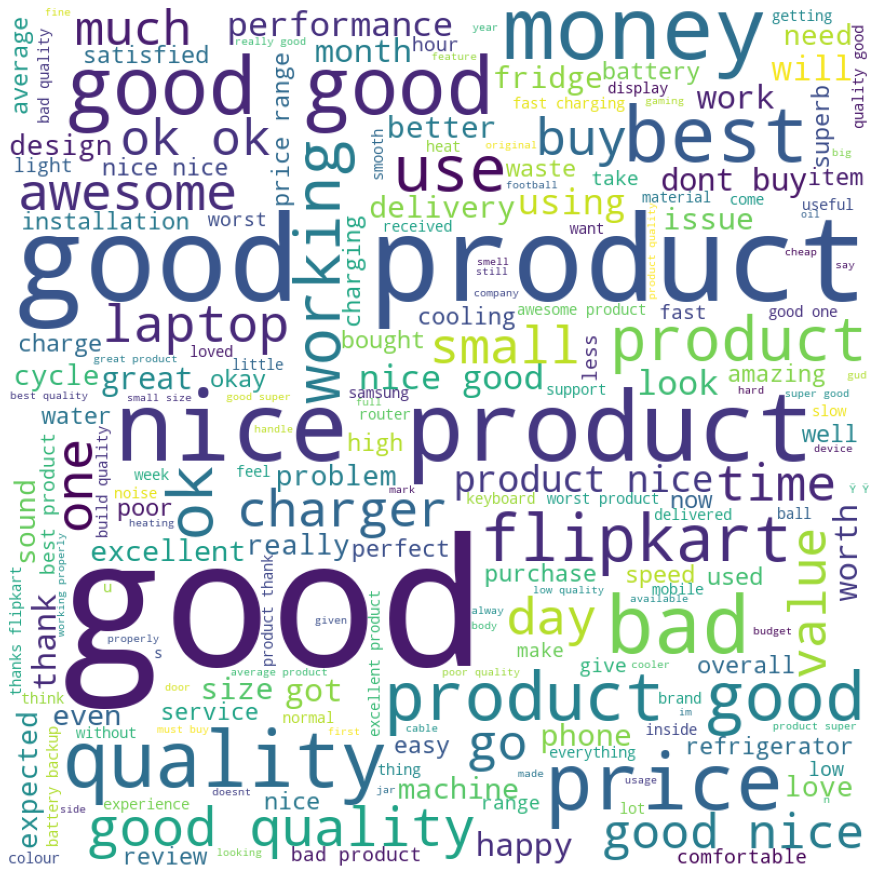

In [26]:
# Concatenate all summary strings
text = " ".join(review for review in data.Summary)

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text)

# Display the generated wordcloud
plt.figure(figsize = (20, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()